<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#featureNormalize(X)" data-toc-modified-id="featureNormalize(X)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>featureNormalize(X)</a></span></li><li><span><a href="#gradientDescentMulti(X,-y,-theta,-alpha,-num_iters)" data-toc-modified-id="gradientDescentMulti(X,-y,-theta,-alpha,-num_iters)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>gradientDescentMulti(X, y, theta, alpha, num_iters)</a></span></li><li><span><a href="#computeCostMulti(X,-y,-theta)" data-toc-modified-id="computeCostMulti(X,-y,-theta)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>computeCostMulti(X, y, theta)</a></span></li><li><span><a href="#Best-alpha-(learning-rate)" data-toc-modified-id="Best-alpha-(learning-rate)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Best alpha (learning rate)</a></span></li><li><span><a href="#Predicting-Values" data-toc-modified-id="Predicting-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting Values</a></span></li><li><span><a href="#Normal-Equation" data-toc-modified-id="Normal-Equation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Normal Equation</a></span></li></ul></div>

Exercício opcional referente a um problema de Regressão Linear com Múltiplas Variáveis

In [1]:
%% Machine Learning Online Class
%  Exercise 1: Linear regression with multiple variables
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear regression exercise. 
%
%  You will need to complete the following functions in this 
%  exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this part of the exercise, you will need to change some
%  parts of the code below for various experiments (e.g., changing
%  learning rates).
%

%% Initialization

%% ================ Part 1: Feature Normalization ================

%% Clear and Close Figures
clear ; close all; clc

fprintf('Loading data ...\n');

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

Loading data ...


In [2]:
% Imprimindo os 10 primeiros resultados de cada arquivo
features = X(1:10, :)
label = y(1:10, :)

features =

   2104      3
   1600      3
   2400      3
   1416      2
   3000      4
   1985      4
   1534      3
   1427      3
   1380      3
   1494      3

label =

   399900
   329900
   369000
   232000
   539900
   299900
   314900
   198999
   212000
   242500



In [3]:
% Uma outra forma de visualizar
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


### featureNormalize(X)

In [4]:
function [X_norm, mu, sigma] = featureNormalize(X)
%FEATURENORMALIZE Normalizes the features in X 
%   FEATURENORMALIZE(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.

% You need to set these values correctly
X_norm = X;
mu = zeros(1, size(X, 2));
sigma = zeros(1, size(X, 2));

% ====================== YOUR CODE HERE ======================
% Instructions: First, for each feature dimension, compute the mean
%               of the feature and subtract it from the dataset,
%               storing the mean value in mu. Next, compute the 
%               standard deviation of each feature and divide
%               each feature by it's standard deviation, storing
%               the standard deviation in sigma. 
%
%               Note that X is a matrix where each column is a 
%               feature and each row is an example. You need 
%               to perform the normalization separately for 
%               each feature. 
%
% Hint: You might find the 'mean' and 'std' functions useful.


% Calculando mu e sigma
for i = 1:2
    mu(i) = mean(X_norm(:, i));
    sigma(i) = std(X_norm(:, i));
end

% Aplicando feature normalization ao dataset X_norm
for i = 1:size(X, 2)
    X_norm(:, i) = (X_norm(:, i) - mu(i)) / sigma(i);
end  

% ============================================================

end

In [5]:
% Chamando função e verificando resultados
[X mu sigma] = featureNormalize(X);

% Primeiras linhas de X normalizado
features = X(1:10, :)

% mu e sigma
medias = mu
desv_pads = sigma

features =

   0.130010  -0.223675
  -0.504190  -0.223675
   0.502476  -0.223675
  -0.735723  -1.537767
   1.257476   1.090417
  -0.019732   1.090417
  -0.587240  -0.223675
  -0.721881  -0.223675
  -0.781023  -0.223675
  -0.637573  -0.223675

medias =

   2000.6809      3.1702

desv_pads =

   794.70235     0.76098



In [6]:
% Add intercept (aditional column x_0) term to X
X = [ones(m, 1) X];
X(1:10, :)

ans =

   1.000000   0.130010  -0.223675
   1.000000  -0.504190  -0.223675
   1.000000   0.502476  -0.223675
   1.000000  -0.735723  -1.537767
   1.000000   1.257476   1.090417
   1.000000  -0.019732   1.090417
   1.000000  -0.587240  -0.223675
   1.000000  -0.721881  -0.223675
   1.000000  -0.781023  -0.223675
   1.000000  -0.637573  -0.223675



### gradientDescentMulti(X, y, theta, alpha, num_iters)

In [7]:
function [theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters)
%GRADIENTDESCENTMULTI Performs gradient descent to learn theta
%   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    % ====================== YOUR CODE HERE ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    % Hint: While debugging, it can be useful to print out the values
    %       of the cost function (computeCostMulti) and gradient here.
    %

    theta = theta - (alpha/m) * X' * ((X * theta) - y);
    
    % delete semicollon if you need to see real time results
    cost_iteration = computeCostMulti(X, y, theta);


    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCostMulti(X, y, theta);

end

end

### computeCostMulti(X, y, theta)

In [8]:
function J = computeCostMulti(X, y, theta)
%COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
%   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta
%               You should set J to the cost.

% Vectorized version

J = 1/(2*m) * ((X * theta) - y)' * ((X * theta) - y);

% =========================================================================

end

### Best alpha (learning rate)

In [9]:
% Choose some alpha value
alpha = 0.01;
num_iters = 400;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% See the minimum cost
min(J_history)

ans =  2108850058.40071


Theta computed from gradient descent (alpha=0.01, iters=400): 
 334302.063993 
 100087.116006 
 3673.548451 



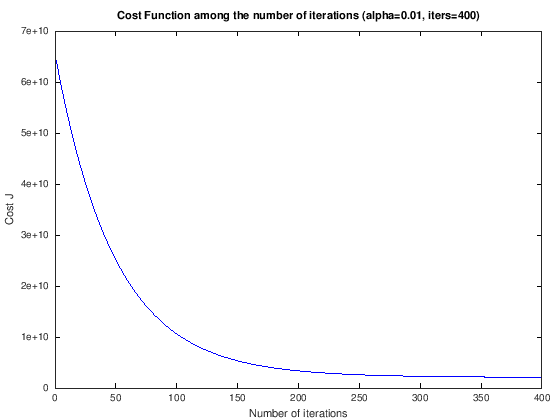

In [10]:
% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations (alpha=0.01, iters=400)')

% Display gradient descent's result
fprintf('Theta computed from gradient descent (alpha=0.01, iters=400): \n');
fprintf(' %f \n', theta);
fprintf('\n');

Visualizando valores para 50 iterações

minimum_cost =  25099179837.57125

Theta computed from gradient descent (alpha=0.01, iters=50): 
 134460.935201 
 39283.227674 
 16518.641918 



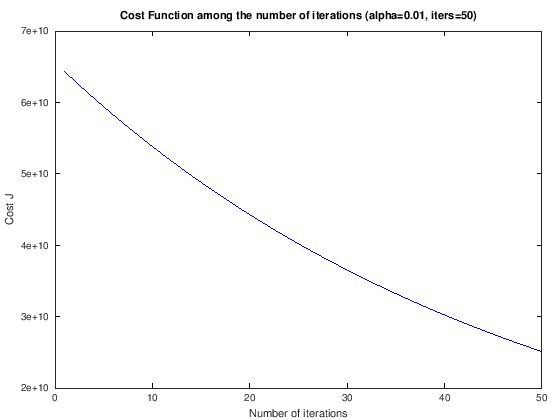

In [11]:
% Choose some alpha value
alpha = 0.01;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);
minimum_cost = min(J_history)

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations (alpha=0.01, iters=50)')

% Display gradient descent's result
fprintf('\nTheta computed from gradient descent (alpha=0.01, iters=50): \n');
fprintf(' %f \n', theta);
fprintf('\n');

minimum_cost =  5239888073.23438

Theta computed from gradient descent (alpha=0.03, iters=50): 
 266180.445191 
 75037.932305 
 18970.040594 



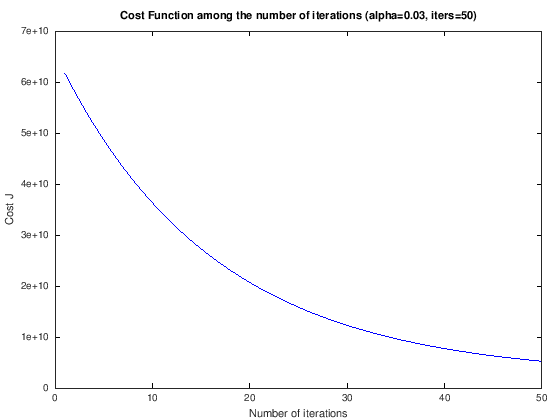

In [12]:
% Choose some alpha value
alpha = 0.03;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);
minimum_cost = min(J_history)

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations (alpha=0.03, iters=50)')

% Display gradient descent's result
fprintf('\nTheta computed from gradient descent (alpha=0.03, iters=50): \n');
fprintf(' %f \n', theta);
fprintf('\n');

minimum_cost =  2062961418.08597

Theta computed from gradient descent (alpha=0.1, iters=50): 
 338658.249249 
 104127.515597 
 -172.205334 



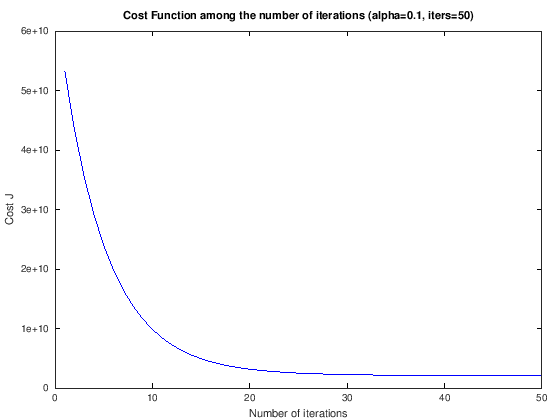

In [13]:
% Choose some alpha value
alpha = 0.1;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);
minimum_cost = min(J_history)

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations (alpha=0.1, iters=50)')

% Display gradient descent's result
fprintf('\nTheta computed from gradient descent (alpha=0.1, iters=50): \n');
fprintf(' %f \n', theta);
fprintf('\n');

minimum_cost =  2043281503.79509

Theta computed from gradient descent (alpha=0.3, iters=50): 
 340412.653452 
 110572.961931 
 -6591.385923 



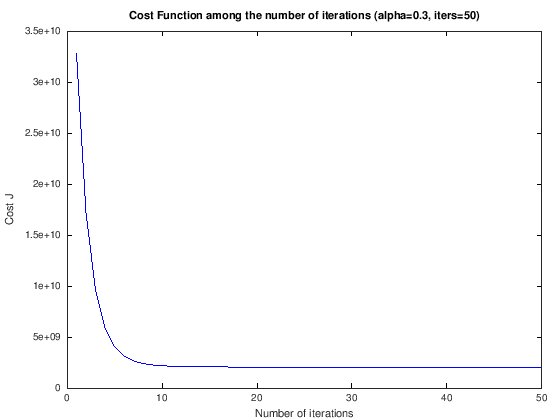

In [14]:
% Choose some alpha value
alpha = 0.3;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);
minimum_cost = min(J_history)

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations (alpha=0.3, iters=50)')

% Display gradient descent's result
fprintf('\nTheta computed from gradient descent (alpha=0.3, iters=50): \n');
fprintf(' %f \n', theta);
fprintf('\n');

In [15]:
# Salvando funções de custo e plotando tudo em um mesmo gráfico

% Primeiro teste
alpha = 0.01;
num_iters = 50;
theta = zeros(3, 1);
[theta, J1] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Segundo teste
alpha = 0.03;
num_iters = 50;
theta = zeros(3, 1);
[theta, J2] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Terceiro teste
alpha = 0.1;
num_iters = 50;
theta = zeros(3, 1);
[theta, J3] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Quarto teste
alpha = 0.3;
num_iters = 50;
theta = zeros(3, 1);
[theta, J4] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Quinto teste
alpha = 1.0;
num_iters = 50;
theta = zeros(3, 1);
[theta, J5] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Sexto teste
alpha = 3.0;
num_iters = 50;
theta = zeros(3, 1);
[theta, J6] = gradientDescentMulti(X, y, theta, alpha, num_iters);

In [16]:
% Verificando resultados
min_J1 = min(J1)
min_J2 = min(J2)
min_J3 = min(J3)
min_J4 = min(J4)
min_J5 = min(J5)
min_J6 = min(J6)

min_J1 =  25099179837.57125
min_J2 =  5239888073.23438
min_J3 =  2062961418.08597
min_J4 =  2043281503.79509
min_J5 =  2043280050.60283
min_J6 =    2.8683e+11


Parece que a partir do Quarto Teste, o valor de custo não muda muito. Além disso, no Sétimo Teste ele não convergeu.

In [17]:
% Testando antes de aplicar um laço de repetição
A = zeros(4, 1)
B = [A ones(4, 1)]

A =

   0
   0
   0
   0

B =

   0   1
   0   1
   0   1
   0   1



In [18]:
% Aplicando laço de repetição 
alpha = 0.01;
i = 1;
J_final = zeros(50, 1);
num_iters = 50;
while alpha <= 3.1
    alpha
    theta = zeros(3, 1);
    [theta, J_iter] = gradientDescentMulti(X, y, theta, alpha, num_iters);
    J_final = [J_final J_iter];
    if mod(i, 2) == 0
        alpha = (alpha / 3) * 10;
    else
        alpha = alpha * 3;
    end
    i = i + 1;
end

alpha =  0.010000
alpha =  0.030000
alpha =  0.10000
alpha =  0.30000
alpha =  1.0000
alpha =  3.0000


In [19]:
% Verificando vetor final de J
J_final

J_final =

 Columns 1 through 6:

   0.0000e+00   6.4301e+10   6.1760e+10   5.3294e+10   3.2769e+10   3.6685e+09
   0.0000e+00   6.3037e+10   5.8165e+10   4.3427e+10   1.7162e+10   2.5167e+09
   0.0000e+00   6.1799e+10   5.4791e+10   3.5500e+10   9.6102e+09   2.1819e+09
   0.0000e+00   6.0587e+10   5.1624e+10   2.9123e+10   5.9038e+09   2.0841e+09
   0.0000e+00   5.9400e+10   4.8653e+10   2.3987e+10   4.0603e+09   2.0554e+09
   0.0000e+00   5.8238e+10   4.5863e+10   1.9846e+10   3.1294e+09   2.0469e+09
   0.0000e+00   5.7100e+10   4.3244e+10   1.6504e+10   2.6505e+09   2.0444e+09
   0.0000e+00   5.5986e+10   4.0785e+10   1.3803e+10   2.3980e+09   2.0436e+09
   0.0000e+00   5.4894e+10   3.8477e+10   1.1620e+10   2.2605e+09   2.0434e+09
   0.0000e+00   5.3825e+10   3.6309e+10   9.8517e+09   2.1826e+09   2.0433e+09
   0.0000e+00   5.2779e+10   3.4272e+10   8.4192e+09   2.1365e+09   2.0433e+09
   0.0000e+00   5.1754e+10   3.2360e+10   7.2573e+09   2.1079e+09   2.0433e+09
   0.0000e+00   5.

In [20]:
% Eliminando primeira coluna auxiliar
J_final = J_final(:, 2:7)

J_final =

   6.4301e+10   6.1760e+10   5.3294e+10   3.2769e+10   3.6685e+09   2.8683e+11
   6.3037e+10   5.8165e+10   4.3427e+10   1.7162e+10   2.5167e+09   1.6072e+12
   6.1799e+10   5.4791e+10   3.5500e+10   9.6102e+09   2.1819e+09   1.2403e+13
   6.0587e+10   5.1624e+10   2.9123e+10   5.9038e+09   2.0841e+09   1.2627e+14
   5.9400e+10   4.8653e+10   2.3987e+10   4.0603e+09   2.0554e+09   1.4878e+15
   5.8238e+10   4.5863e+10   1.9846e+10   3.1294e+09   2.0469e+09   1.8548e+16
   5.7100e+10   4.3244e+10   1.6504e+10   2.6505e+09   2.0444e+09   2.3567e+17
   5.5986e+10   4.0785e+10   1.3803e+10   2.3980e+09   2.0436e+09   3.0126e+18
   5.4894e+10   3.8477e+10   1.1620e+10   2.2605e+09   2.0434e+09   3.8584e+19
   5.3825e+10   3.6309e+10   9.8517e+09   2.1826e+09   2.0433e+09   4.9447e+20
   5.2779e+10   3.4272e+10   8.4192e+09   2.1365e+09   2.0433e+09   6.3380e+21
   5.1754e+10   3.2360e+10   7.2573e+09   2.1079e+09   2.0433e+09   8.1243e+22
   5.0750e+10   3.0564e+10   6.3139e+09  

In [21]:
% Plotando os melhores resultados para cada iteração
for i = 1:size(J_final, 2),
    fprintf('Menor custo para J%d: %.2f\n', i, min(J_final(:, i)));
end

Menor custo para J1: 25099179837.57
Menor custo para J2: 5239888073.23
Menor custo para J3: 2062961418.09
Menor custo para J4: 2043281503.80
Menor custo para J5: 2043280050.60
Menor custo para J6: 286833371473.62


Visivelmente não há diferenças entre J4 e J5... além disso, J6 não convergiu.

In [22]:
help numel

'numel' is a built-in function from the file libinterp/corefcn/data.cc

 -- numel (A)
 -- numel (A, IDX1, IDX2, ...)
     Return the number of elements in the object A.

     Optionally, if indices IDX1, IDX2, ... are supplied, return the
     number of elements that would result from the indexing

          A(IDX1, IDX2, ...)

     Note that the indices do not have to be scalar numbers.  For
     example,

          A = 1;
          B = ones (2, 3);
          numel (A, B)

     will return 6, as this is the number of ways to index with B.  Or
     the index could be the string ":" which represents the colon
     operator.  For example,

          A = ones (5, 3);
          numel (A, 2, ":")

     will return 3 as the second row has three column entries.

     This method is also called when an object appears as lvalue with
     cs-list indexing, i.e., 'object{...}' or 'object(...).field'.

     See also: size, length, ndims.

Additional help for built-in functions and operators is
ava

In [23]:
colors = ['k', 'm', 'y', 'g', 'r']
typeinfo(colors(1))
typeinfo('-')

colors = kmygr
ans = sq_string
ans = sq_string


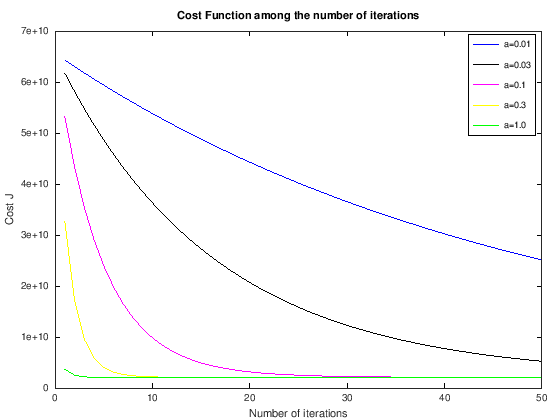

In [24]:
% Plot the convergence graph
figure;
colors = ['k', 'm', 'y', 'g', 'r'];
plot(1:50, J_final(:, 1), '-b', 'LineWidth', 2);
hold on;
for i = 2:size(J_final, 2)-1,
    plot(1:50, J_final(:, i), colors(i-1), 'LineWidth', 2);
end
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations');
legend('a=0.01', 'a=0.03', 'a=0.1', 'a=0.3', 'a=1.0');

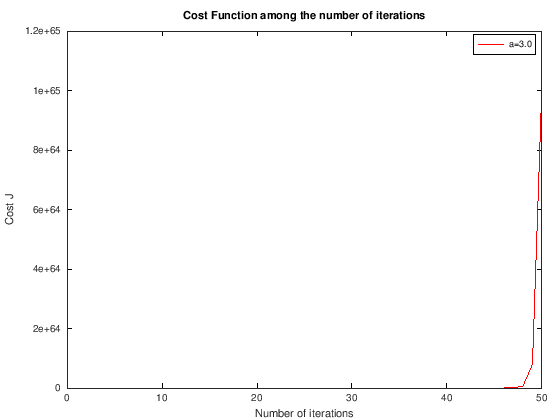

In [25]:
% Comprovando que o último testse não convergiu
figure();
plot(1:50, J_final(:, 6), 'r', 'Linewidth', 2)
xlabel('Number of iterations');
ylabel('Cost J');
title('Cost Function among the number of iterations');
legend('a=3.0');

### Predicting Values

In [26]:
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.

% Recalculando theta com o melhor learning rate
alpha = 1.0;
num_iters = 50;
theta = zeros(3, 1);
[theta, J_best] = gradientDescentMulti(X, y, theta, alpha, num_iters);
theta

% Normalizing features and predicting price
features = [1650 3];
features = (features .- mu) ./ sigma
price = [1 features] * theta

theta =

   340412.65957
   110631.05028
    -6649.47427

features =

  -0.44127  -0.22368

price =  293081.46433


### Normal Equation

In [27]:
function [theta] = normalEqn(X, y)
%NORMALEQN Computes the closed-form solution to linear regression 
%   NORMALEQN(X,y) computes the closed-form solution to linear 
%   regression using the normal equations.

theta = zeros(size(X, 2), 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the code to compute the closed form solution
%               to linear regression and put the result in theta.
%

% ---------------------- Sample Solution ----------------------

theta = (X' * X)^(-1) * X' * y;


% -------------------------------------------------------------


% ============================================================

end

In [28]:
% Lendo novamente arquivo e aplicando todo o pipeline de predição
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept (aditional column x_0) term to X
X = [ones(m, 1) X];

% Getting theta through normal equation
theta = normalEqn(X, y)

% Predicting values
price = [1 1650 3] * theta

theta =

   89597.90954
     139.21067
   -8738.01911

price =  293081.46433
